# Gaussian Distribution or Normal Distribution

## Transforming Data to Better Fit The Normal Distribution

### Import Libraries and Dataset

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
train=pd.read_csv('Mobile_phone_train.csv')

In [31]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Skewness

Skewness essentially is a commonly used measure in descriptive statistics that characterizes the asymmetry of a data distribution.

Types of Skewness:

    Positive Skewness : 
    Mean > Median >Mode

    Negative Skewness : 
    Mode > Median > Mean

    Zero Skewness(Symmetric Distribution) : 
    Mean = Mode = Median

In [6]:
from scipy.stats import skew

battery_power
0.03187454295305568


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


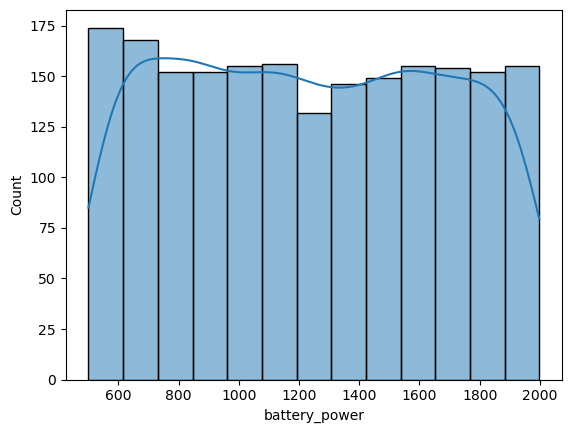

blue
0.02000100007500624


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


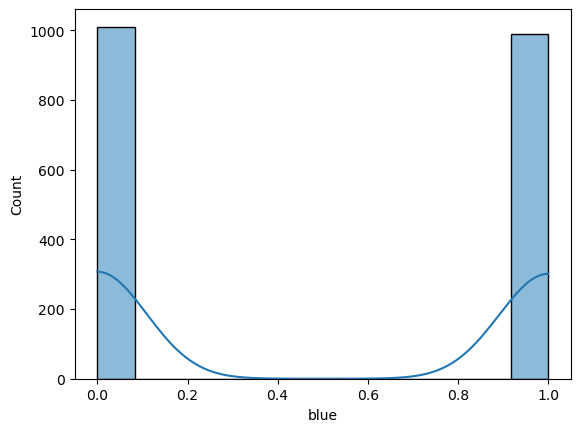

clock_speed
0.17795052935349268


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


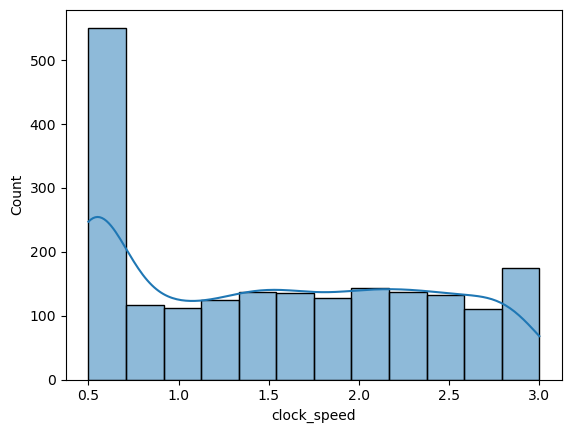

dual_sim
-0.03800686085763292


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


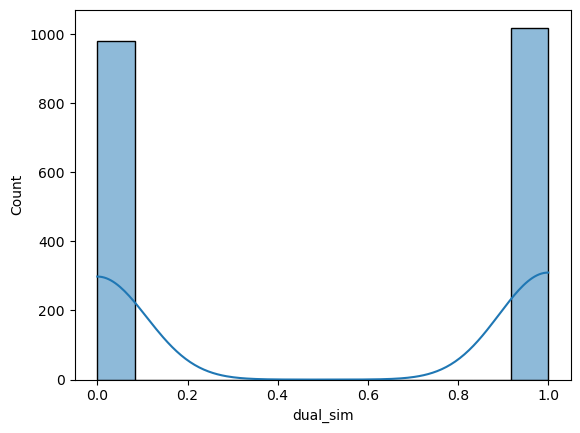

fc
1.0190463925723268


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


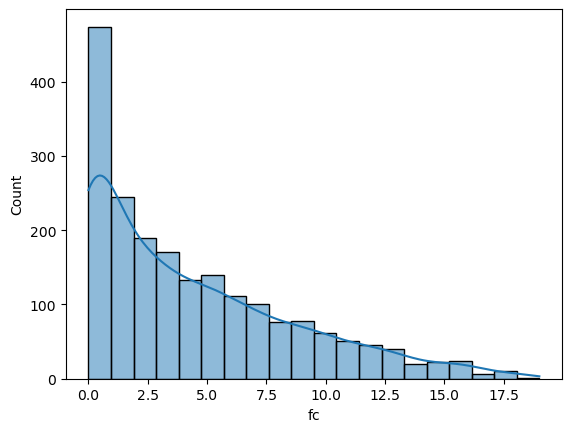

four_g
-0.08607961742649396


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


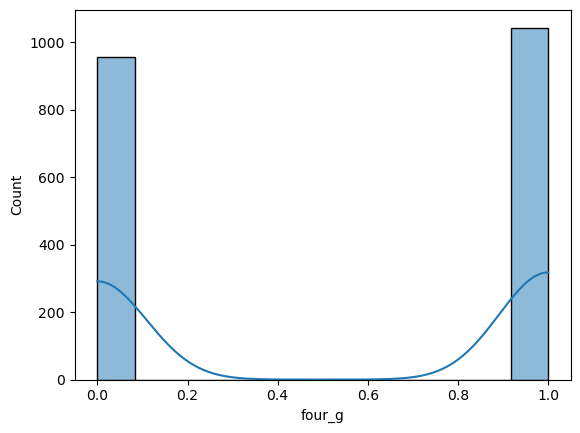

int_memory
0.05784590180779676


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


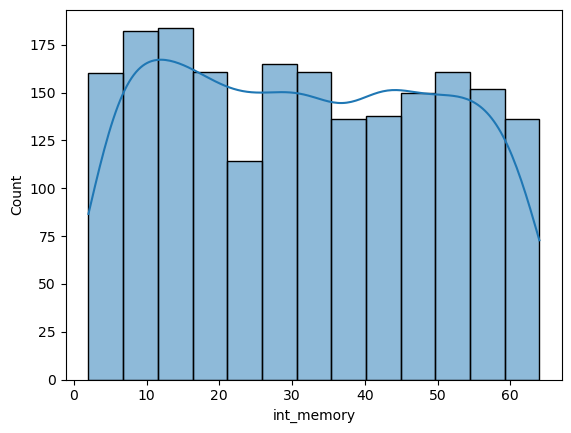

m_dep
0.08901518436117652


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


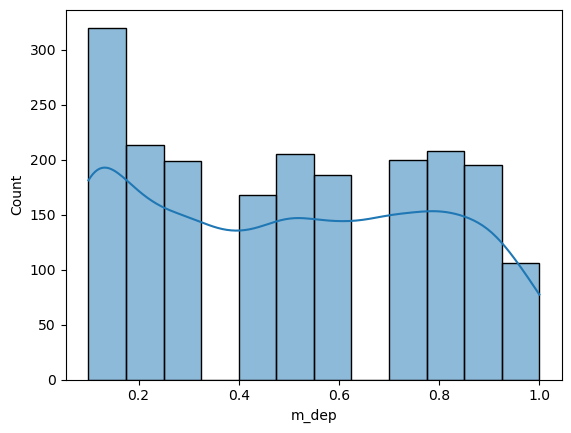

mobile_wt
0.0065532377855500356


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


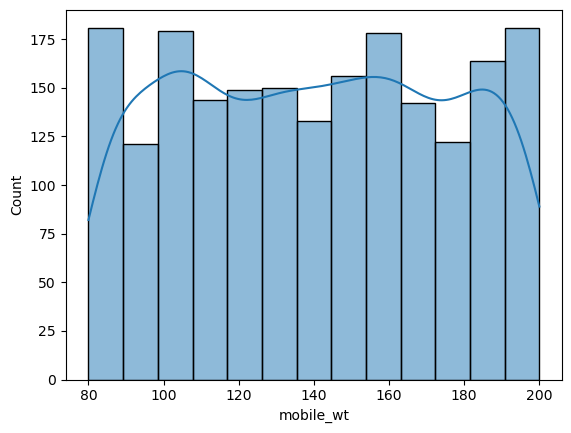

n_cores
0.0036247871155484306


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


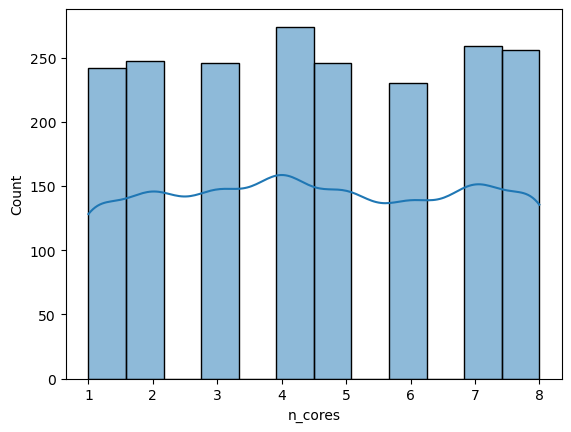

pc
0.017293168153506185


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


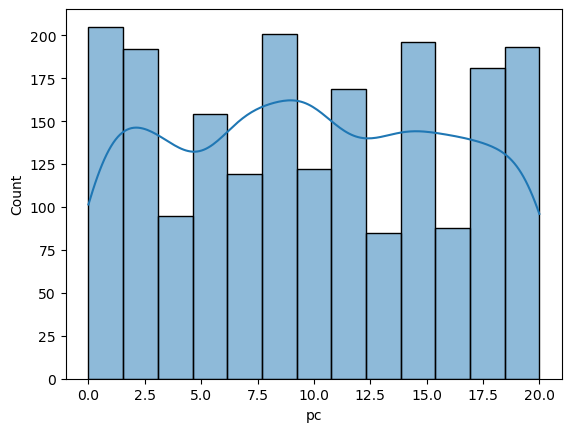

px_height
0.6657714484857727


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


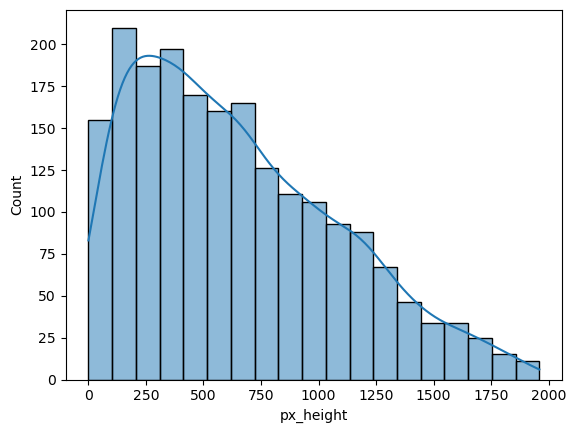

px_width
0.014776380851328284


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


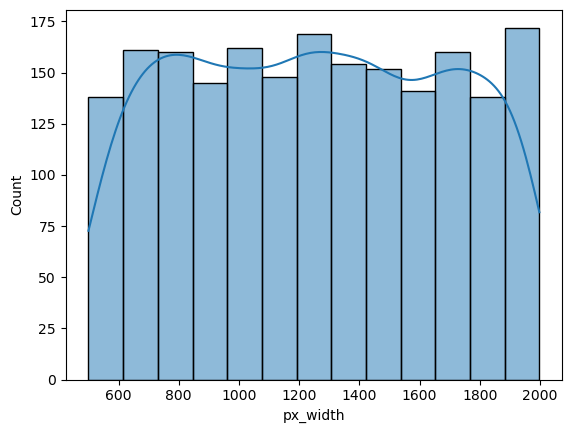

ram
0.006623063336208135


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


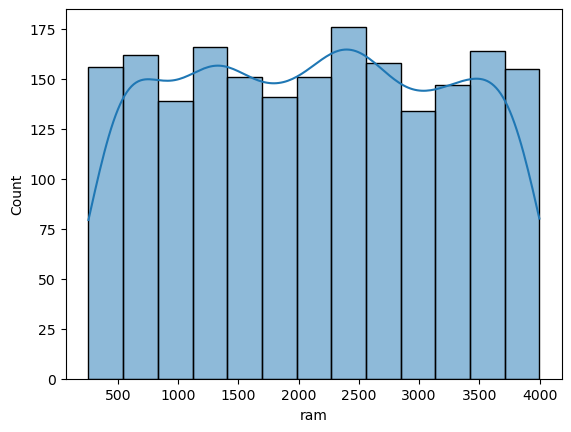

sc_h
-0.0988100623460247


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


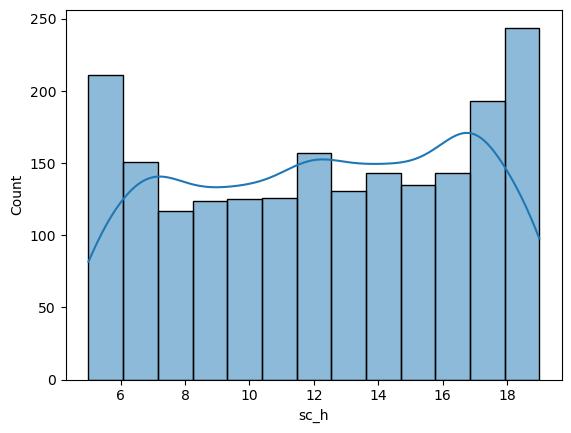

sc_w
0.6333116340766181


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


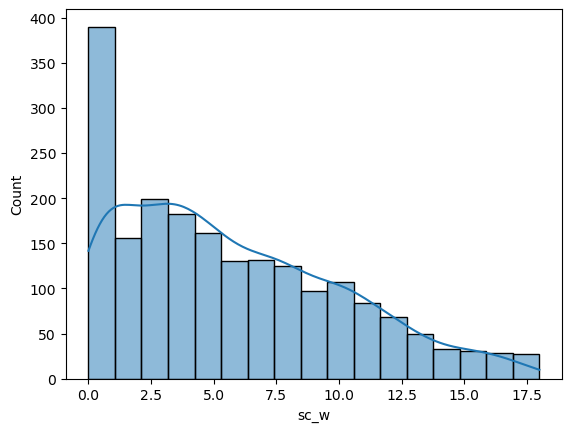

talk_time
0.00950462691314207


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


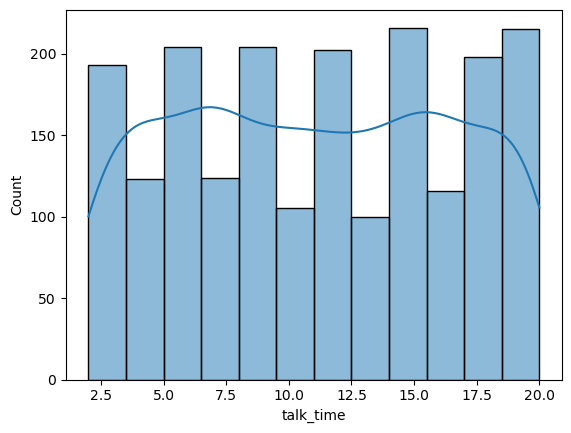

three_g
-1.2272203362251917


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


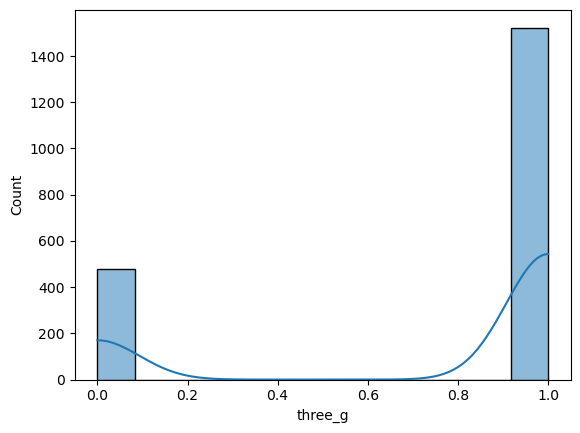

touch_screen
-0.01200021600583211


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


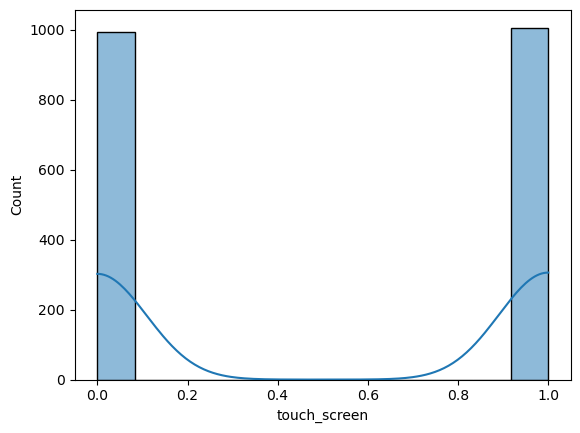

wifi
-0.02800274440343397


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


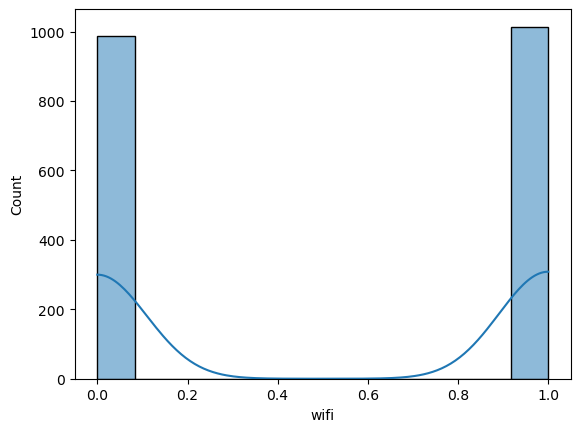

price_range
0.0


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


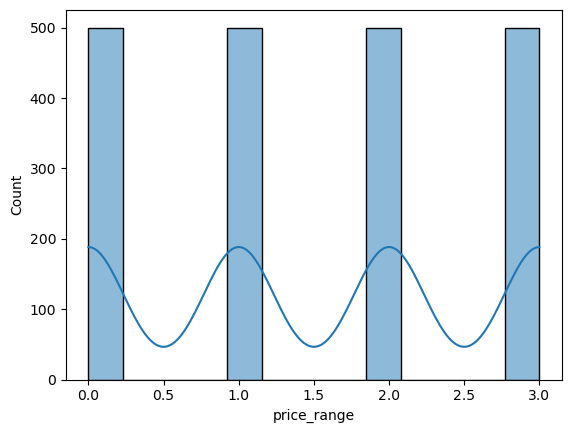

In [94]:
for col in train:
    print(col)
    print(skew(train[col]))
    
    plt.figure()
    sns.histplot(train[col],kde=True)
    plt.show()
    

## Feature with its skewed value
clock_speed
0.17795052935349268

fc
1.0190463925723268

px_height
0.6657714484857727

sc_w
0.6333116340766181

three_g
-1.2272203362251917

<Axes: >

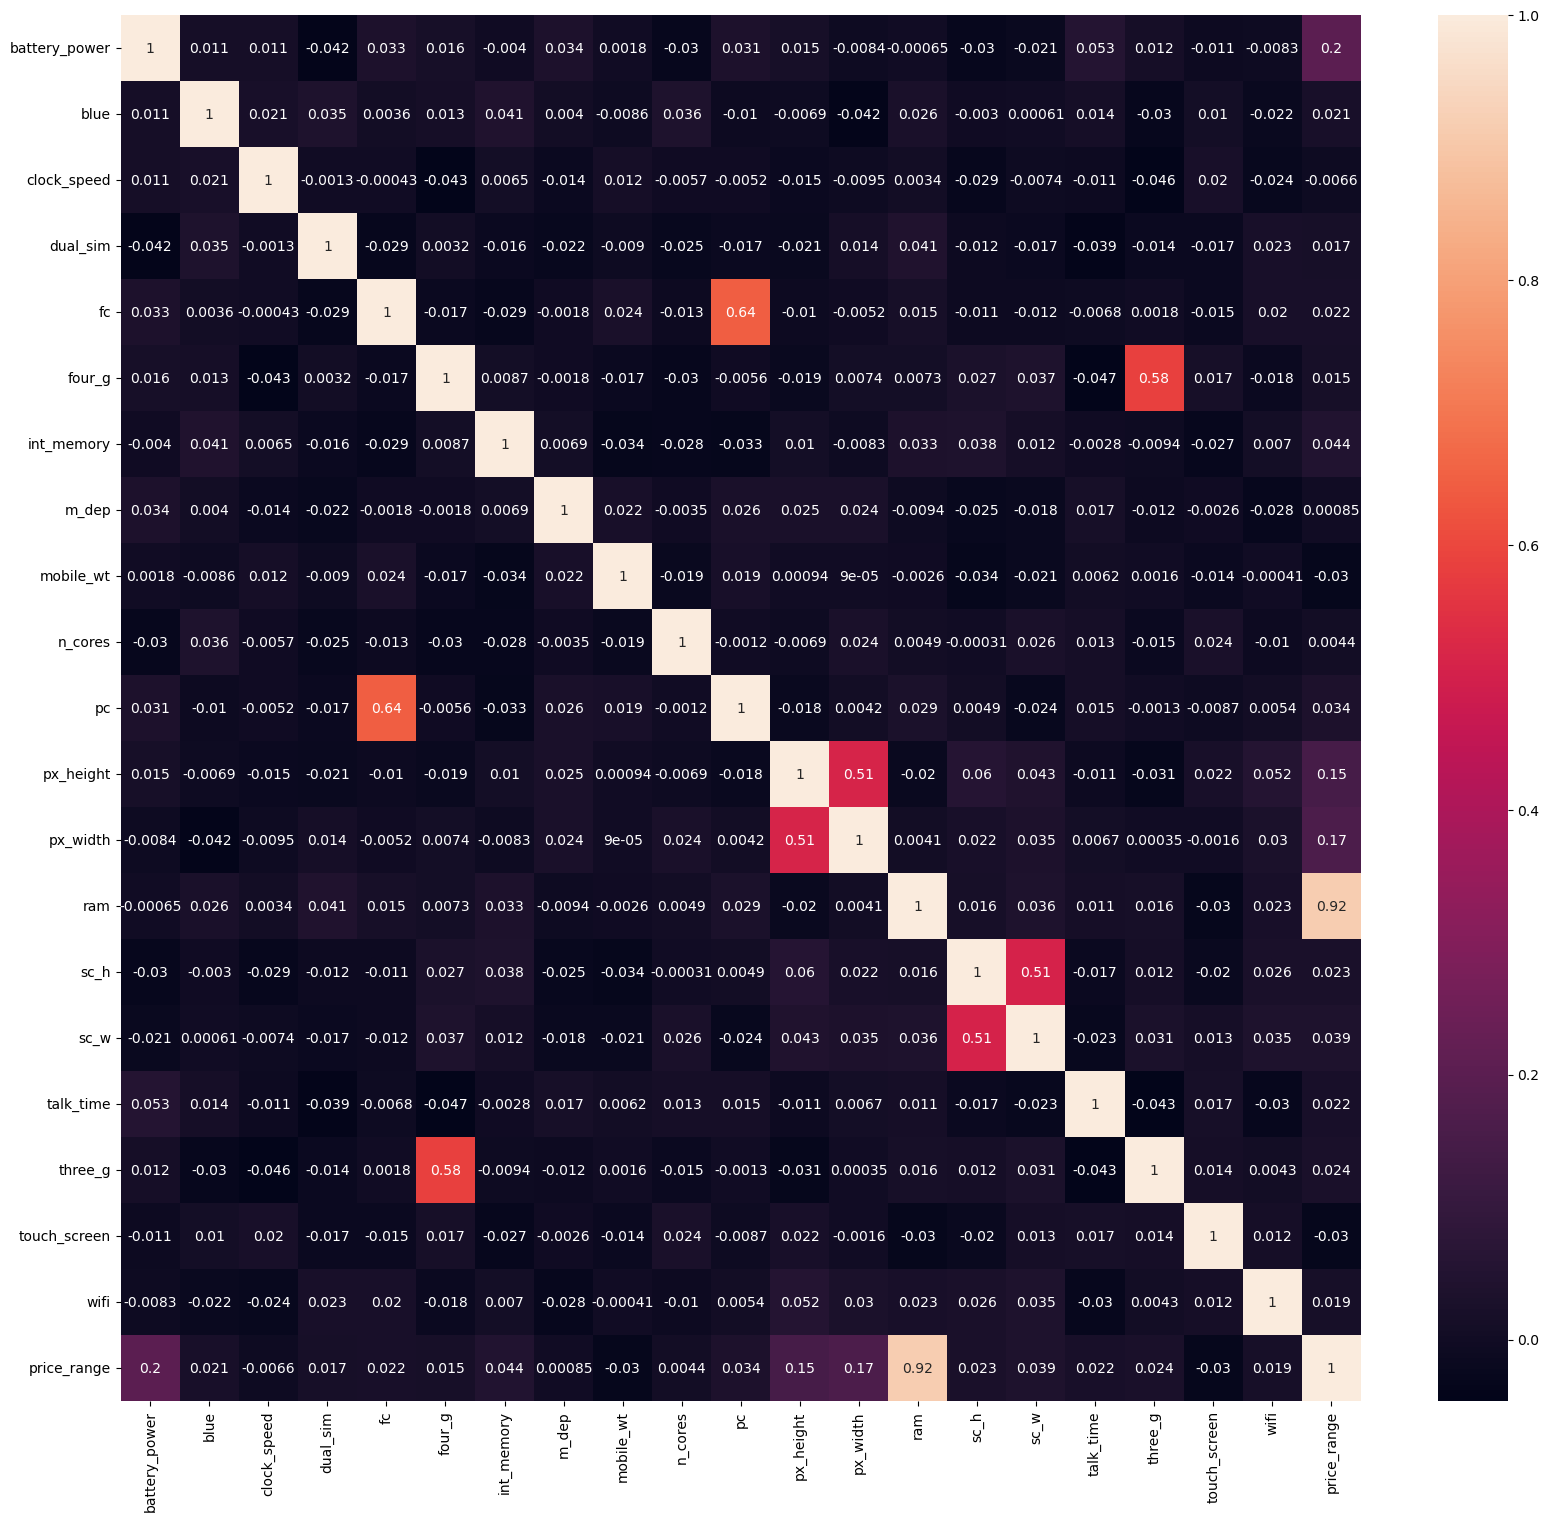

In [95]:
plt.figure(figsize=(20,18))
sns.heatmap(train.corr(), annot=True)

In [96]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [97]:
train_log = train[['clock_speed', 'fc', 'px_height', 'sc_w', 'three_g', 'price_range']].copy()

In [98]:
train_log.head()

,clock_speed,fc,px_height,sc_w,three_g,price_range
0,2.2,1,20,7,0,1
1,0.5,0,905,3,1,2
2,0.5,2,1263,2,1,2
3,2.5,0,1216,8,1,2
4,1.2,13,1208,2,1,1


<Axes: >

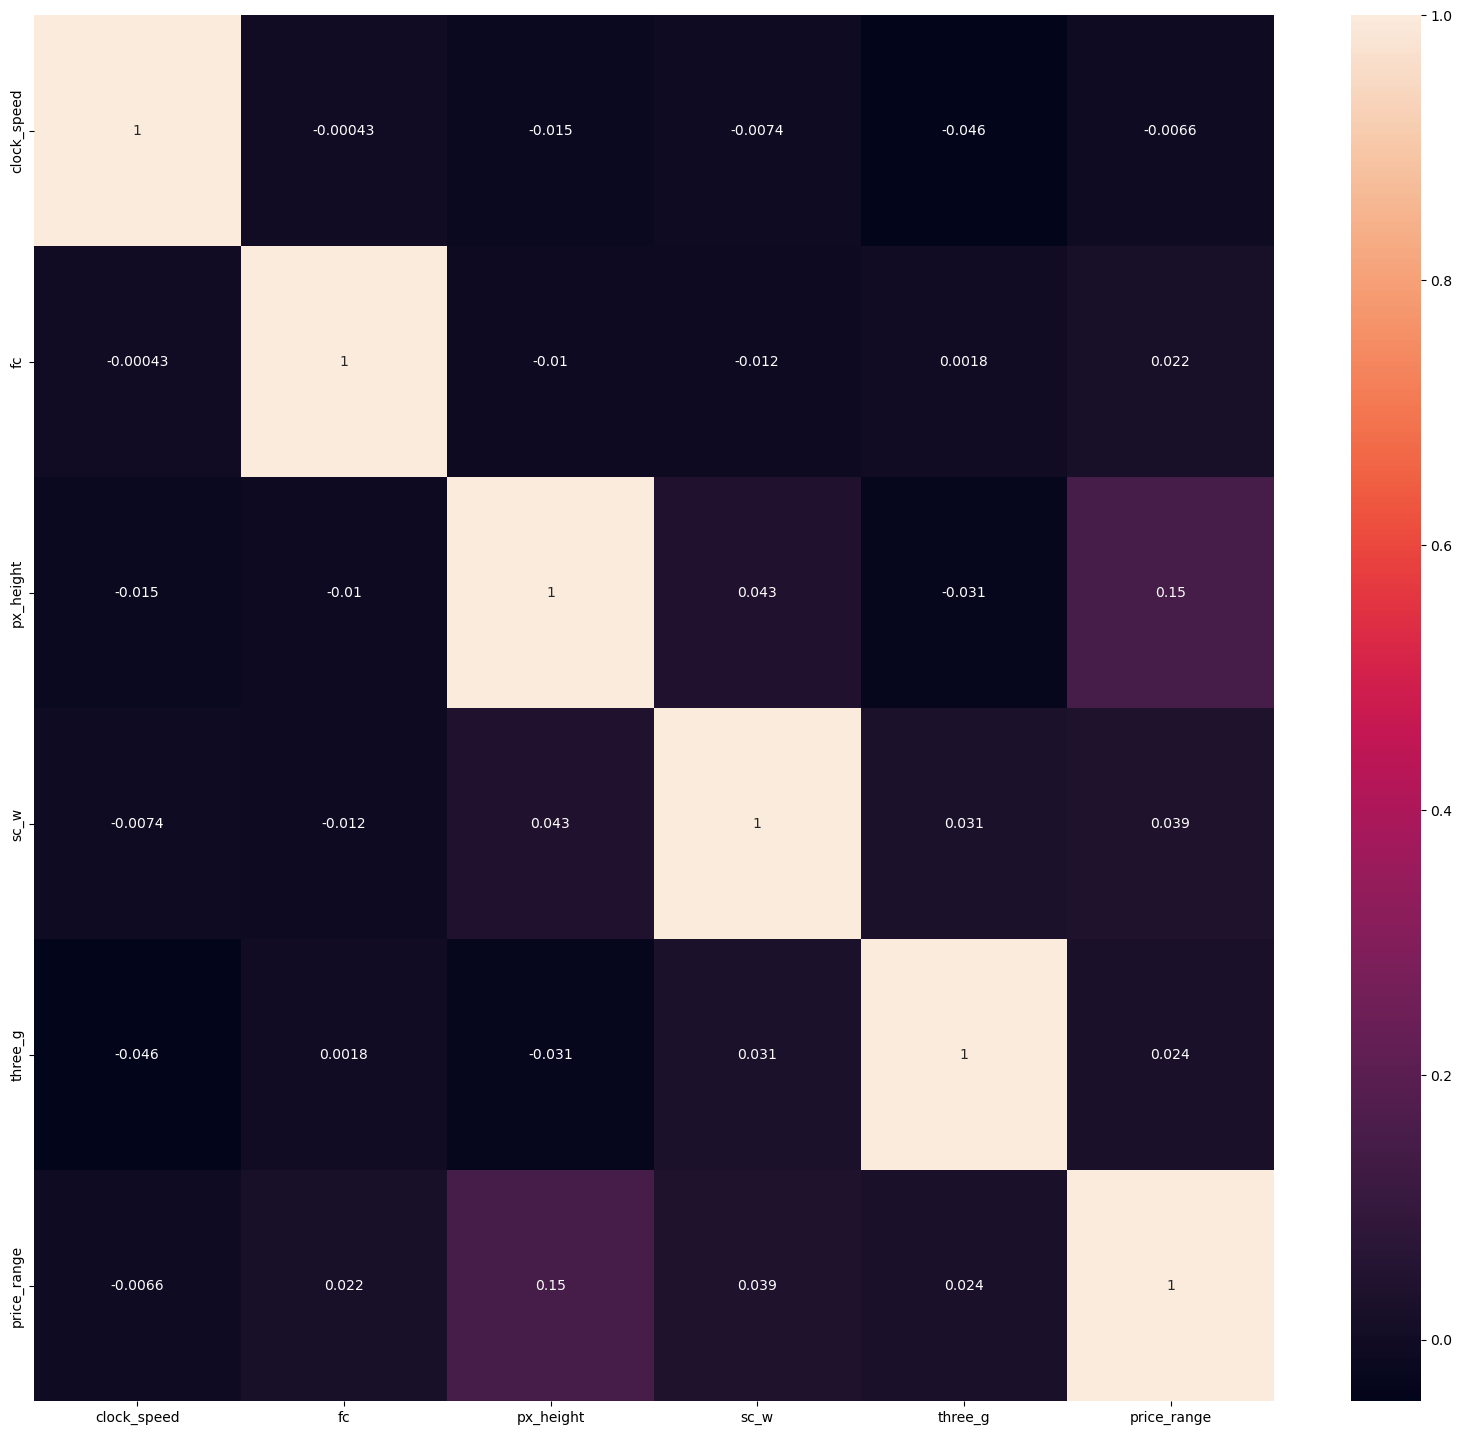

In [99]:
plt.figure(figsize=(20,18))
sns.heatmap(train_log.corr(), annot=True)

## Logarithmic Transformation

Skewness value (Original) 0.17795052935349268
Skewness value (New) -0.3467999125728359


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


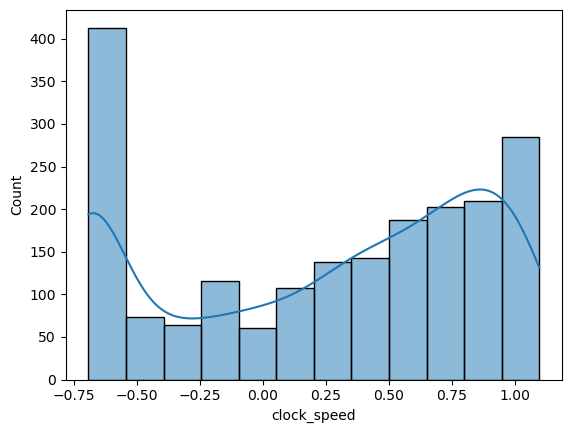

In [100]:
# import numpy
# clock_speed is slightly right skewed
print("Skewness value (Original)",skew(train_log['clock_speed']))
train_log['clock_speed']=np.log(train_log['clock_speed'])
print("Skewness value (New)",skew(train_log['clock_speed']))
plt.figure()
sns.histplot(train_log['clock_speed'],kde=True)
plt.show()

log1p : This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

Skewness value (Original) 1.0190463925723268
Skewness value (New) -0.1185628429728601


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


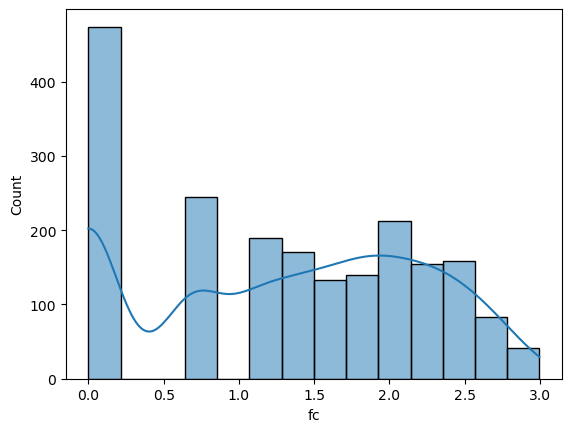

In [101]:
# fc is right skewed FC contain 0 value as well log 0 not defined
print("Skewness value (Original)",skew(train_log['fc']))
train_log['fc']=np.log1p(train_log['fc'])
print("Skewness value (New)",skew(train_log['fc']))
plt.figure()
sns.histplot(train_log['fc'],kde=True)
plt.show()

Skewness value (Original) 0.6657714484857727
Skewness value (New) -1.5126325753318333


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


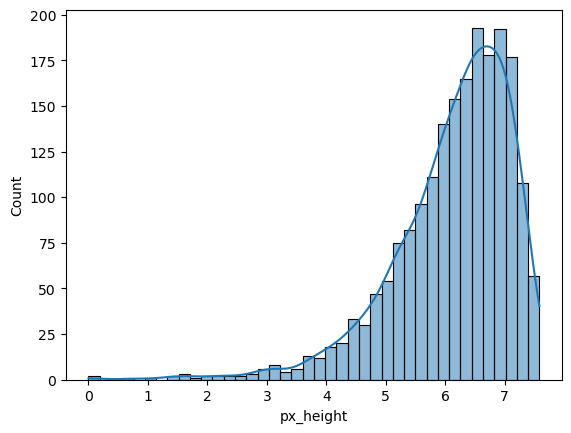

In [102]:
# px_height is slightly right skewed px_height contain 0 value as well log 0 not defined
print("Skewness value (Original)",skew(train_log['px_height']))
train_log['px_height']=np.log1p(train_log['px_height'])
print("Skewness value (New)",skew(train_log['px_height']))
plt.figure()
sns.histplot(train_log['px_height'],kde=True)
plt.show()

Skewness value (Original) 0.6333116340766181
Skewness value (New) -0.6029334921823312


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


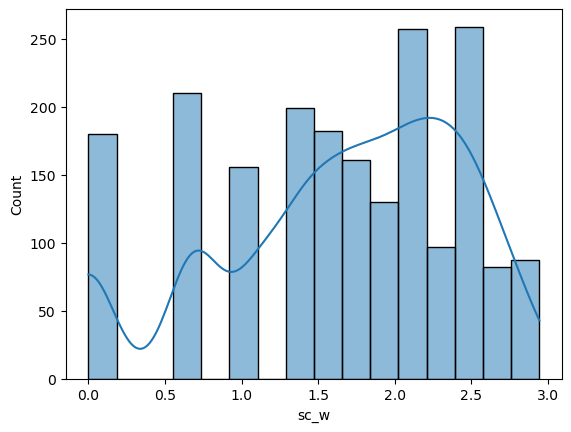

In [103]:
# sc_w is right skewed sc_w contain 0 value as well log 0 not defined
print("Skewness value (Original)",skew(train_log['sc_w']))
train_log['sc_w']=np.log1p(train_log['sc_w'])
print("Skewness value (New)",skew(train_log['sc_w']))
plt.figure()
sns.histplot(train_log['sc_w'],kde=True)
plt.show()

Skewness value (Original) -1.2272203362251917
Skewness value (New) -1.2272203362251928


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


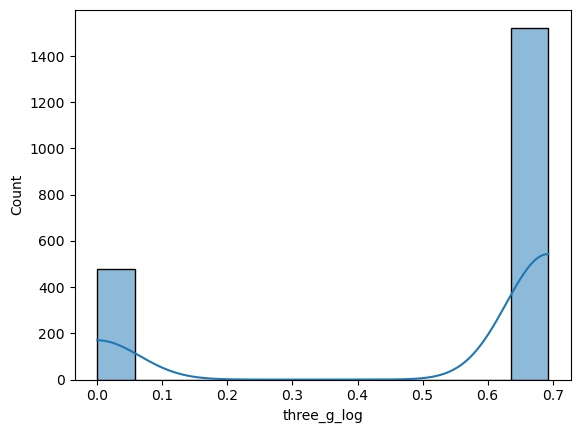

In [104]:
# three_g is  skewed three_g contain 0 value as well log 0 not defined
print("Skewness value (Original)",skew(train_log['three_g']))
train_log['three_g_log']=np.log1p(train_log['three_g'])
print("Skewness value (New)",skew(train_log['three_g_log']))
plt.figure()
sns.histplot(train_log['three_g_log'],kde=True)
plt.show()

## SquareRoot Transformation

In [105]:
train_rt = train
train_rt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [106]:
for col in train_rt:
    print(col)
    print(skew(train_rt[col]))

battery_power
0.03187454295305568
blue
0.02000100007500624
clock_speed
0.17795052935349268
dual_sim
-0.03800686085763292
fc
1.0190463925723268
four_g
-0.08607961742649396
int_memory
0.05784590180779676
m_dep
0.08901518436117652
mobile_wt
0.0065532377855500356
n_cores
0.0036247871155484306
pc
0.017293168153506185
px_height
0.6657714484857727
px_width
0.014776380851328284
ram
0.006623063336208135
sc_h
-0.0988100623460247
sc_w
0.6333116340766181
talk_time
0.00950462691314207
three_g
-1.2272203362251917
touch_screen
-0.01200021600583211
wifi
-0.02800274440343397
price_range
0.0


Skewness value (Original) 0.17795052935349268
Skewness value (New) -0.08887628600495244


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


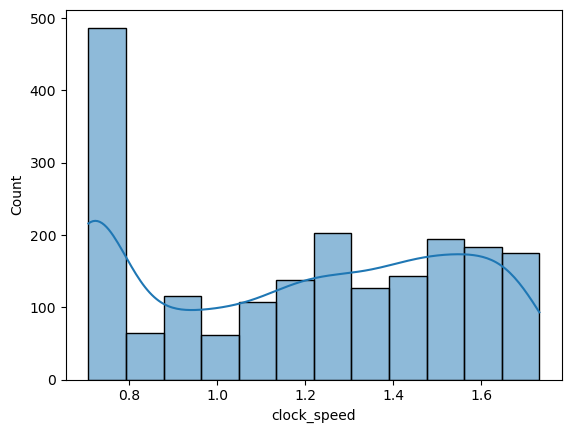

In [107]:
print("Skewness value (Original)",skew(train_rt['clock_speed']))
# import numpy
# clock_speed is slightly right skewed
train_rt['clock_speed']=np.sqrt(train_rt['clock_speed'])
print("Skewness value (New)",skew(train_rt['clock_speed']))
plt.figure()
sns.histplot(train_rt['clock_speed'],kde=True)
plt.show()

Skewness value (Original) 1.0190463925723268
Skewness value (New) 0.013135043467336887


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


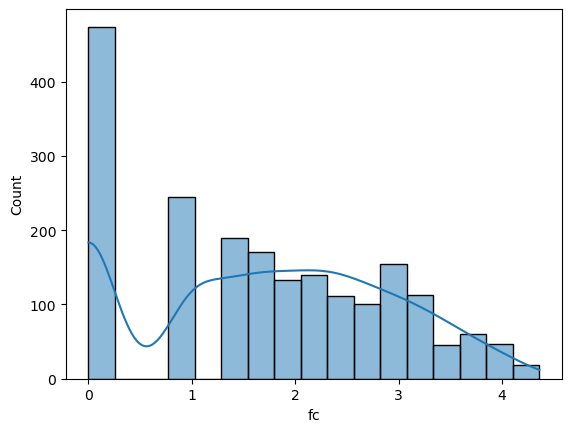

In [108]:
print("Skewness value (Original)",skew(train_rt['fc']))
# fc is right skewed
train_rt['fc']=np.sqrt(train_rt['fc'])
print("Skewness value (New)",skew(train_rt['fc']))
plt.figure()
sns.histplot(train_rt['fc'], kde = True)
plt.show()

Skewness value (Original) 0.6657714484857727
Skewness value (New) -0.054709927547688934


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


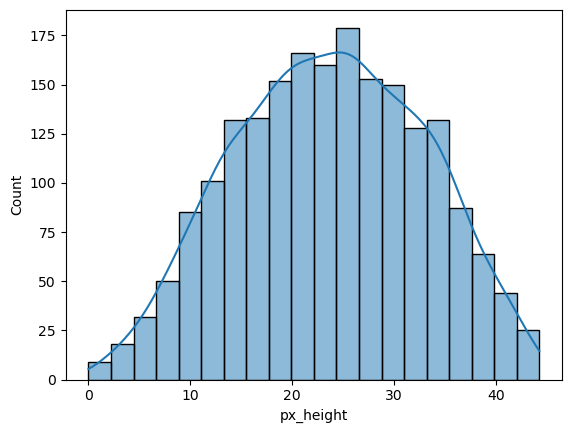

In [109]:
print("Skewness value (Original)",skew(train_rt['px_height']))
# px_height is slightly right skewed
train_rt['px_height']=np.sqrt(train_rt['px_height'])
print("Skewness value (New)",skew(train_rt['px_height']))
plt.figure()
sns.histplot(train_rt['px_height'], kde = True)
plt.show()

In [110]:
for col in train_rt:
    print(col)
    print(skew(train_rt[col]))

battery_power
0.03187454295305568
blue
0.02000100007500624
clock_speed
-0.08887628600495244
dual_sim
-0.03800686085763292
fc
0.013135043467336887
four_g
-0.08607961742649396
int_memory
0.05784590180779676
m_dep
0.08901518436117652
mobile_wt
0.0065532377855500356
n_cores
0.0036247871155484306
pc
0.017293168153506185
px_height
-0.054709927547688934
px_width
0.014776380851328284
ram
0.006623063336208135
sc_h
-0.0988100623460247
sc_w
0.6333116340766181
talk_time
0.00950462691314207
three_g
-1.2272203362251917
touch_screen
-0.01200021600583211
wifi
-0.02800274440343397
price_range
0.0


In [111]:
train_sqrt=train_rt
train_sqrt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,1.483240,0,1.000000,0,7,0.6,188,2,...,4.472136,756,2549,9,7,19,0,0,1,1
1,1021,1,0.707107,1,0.000000,1,53,0.7,136,3,...,30.083218,1988,2631,17,3,7,1,1,0,2
2,563,1,0.707107,1,1.414214,1,41,0.9,145,5,...,35.538711,1716,2603,11,2,9,1,1,0,2
3,615,1,1.581139,0,0.000000,0,10,0.8,131,6,...,34.871192,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.095445,0,3.605551,1,44,0.6,141,2,...,34.756294,1212,1411,8,2,15,1,1,0,1


Skewness value (Original) 0.6333116340766181
Skewness value (New) -0.36612624728778675


C:\Users\sagar\AppData\Local\Temp\ipykernel_10316\1563885059.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_sqrt['sc_w'])
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

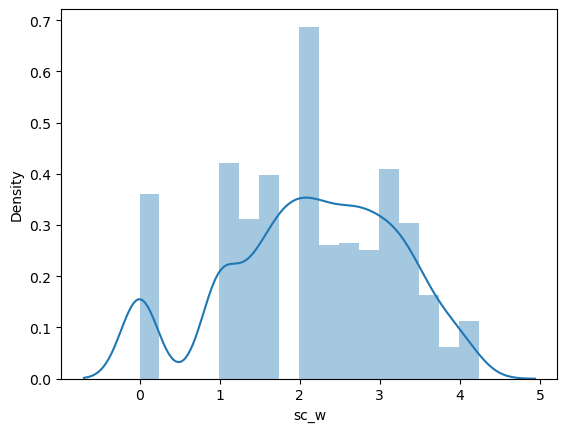

In [25]:
print("Skewness value (Original)",skew(train_sqrt['sc_w']))
# sc_w is slightly right skewed
train_sqrt['sc_w']=np.sqrt(train_sqrt['sc_w'])
print("Skewness value (New)",skew(train_sqrt['sc_w']))
plt.figure()
sns.distplot(train_sqrt['sc_w'])
plt.show()

## Cuberoot Transformation

In [51]:
train_cbrt = train_rt
train_cbrt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,1.483240,0,1.000000,0,7,0.6,188,2,...,4.472136,756,2549,9,7,19,0,0,1,1
1,1021,1,0.707107,1,0.000000,1,53,0.7,136,3,...,30.083218,1988,2631,17,3,7,1,1,0,2
2,563,1,0.707107,1,1.414214,1,41,0.9,145,5,...,35.538711,1716,2603,11,2,9,1,1,0,2
3,615,1,1.581139,0,0.000000,0,10,0.8,131,6,...,34.871192,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.095445,0,3.605551,1,44,0.6,141,2,...,34.756294,1212,1411,8,2,15,1,1,0,1


Skewness value (Original) 0.6333116340766181
Skewness value (New) -1.0558090132315177


C:\Users\sagar\AppData\Local\Temp\ipykernel_10316\1764700196.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_cbrt['sc_w'])
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

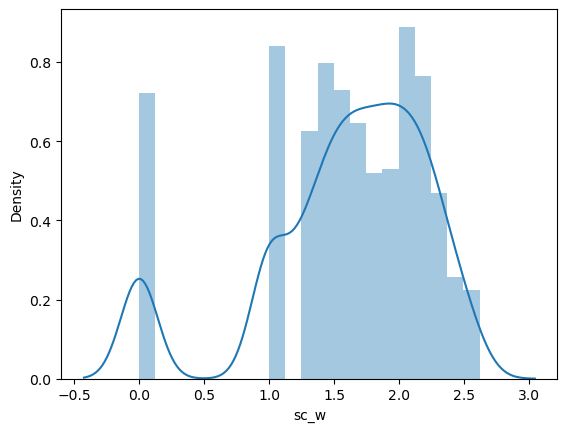

In [53]:
print("Skewness value (Original)",skew(train_cbrt['sc_w']))
# sc_w is slightly right skewed
train_cbrt['sc_w']=np.cbrt(train_cbrt['sc_w'])
print("Skewness value (New)",skew(train_cbrt['sc_w']))
plt.figure()
sns.distplot(train_cbrt['sc_w'])
plt.show()

## BoxCox Transformation

In [112]:
for col in train_rt:
    print(col)
    print(skew(train_rt[col]))

battery_power
0.03187454295305568
blue
0.02000100007500624
clock_speed
-0.08887628600495244
dual_sim
-0.03800686085763292
fc
0.013135043467336887
four_g
-0.08607961742649396
int_memory
0.05784590180779676
m_dep
0.08901518436117652
mobile_wt
0.0065532377855500356
n_cores
0.0036247871155484306
pc
0.017293168153506185
px_height
-0.054709927547688934
px_width
0.014776380851328284
ram
0.006623063336208135
sc_h
-0.0988100623460247
sc_w
0.6333116340766181
talk_time
0.00950462691314207
three_g
-1.2272203362251917
touch_screen
-0.01200021600583211
wifi
-0.02800274440343397
price_range
0.0


In [113]:
train_BCT = train_rt.copy()
train_BCT.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,1.483240,0,1.000000,0,7,0.6,188,2,...,4.472136,756,2549,9,7,19,0,0,1,1
1,1021,1,0.707107,1,0.000000,1,53,0.7,136,3,...,30.083218,1988,2631,17,3,7,1,1,0,2
2,563,1,0.707107,1,1.414214,1,41,0.9,145,5,...,35.538711,1716,2603,11,2,9,1,1,0,2
3,615,1,1.581139,0,0.000000,0,10,0.8,131,6,...,34.871192,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.095445,0,3.605551,1,44,0.6,141,2,...,34.756294,1212,1411,8,2,15,1,1,0,1


Skewness value (Original) 0.6333116340766181
Skewness value (New) -0.09386049582946543


C:\Users\sagar\AppData\Local\Temp\ipykernel_10316\54282218.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_BCT['sc_w'])
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

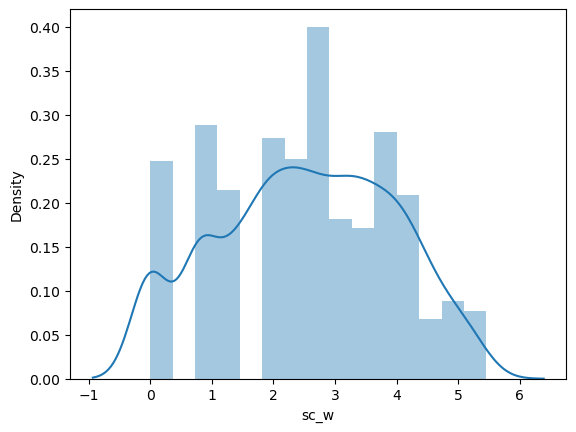

In [114]:
# sc is right skewed
from scipy import stats as stat
print("Skewness value (Original)",skew(train_BCT['sc_w']))
train_BCT['sc_w'],parameters=stat.boxcox(train_BCT['sc_w']+1)
print("Skewness value (New)",skew(train_BCT['sc_w']))
plt.figure()
sns.distplot(train_BCT['sc_w'])
plt.show()

<Axes: >

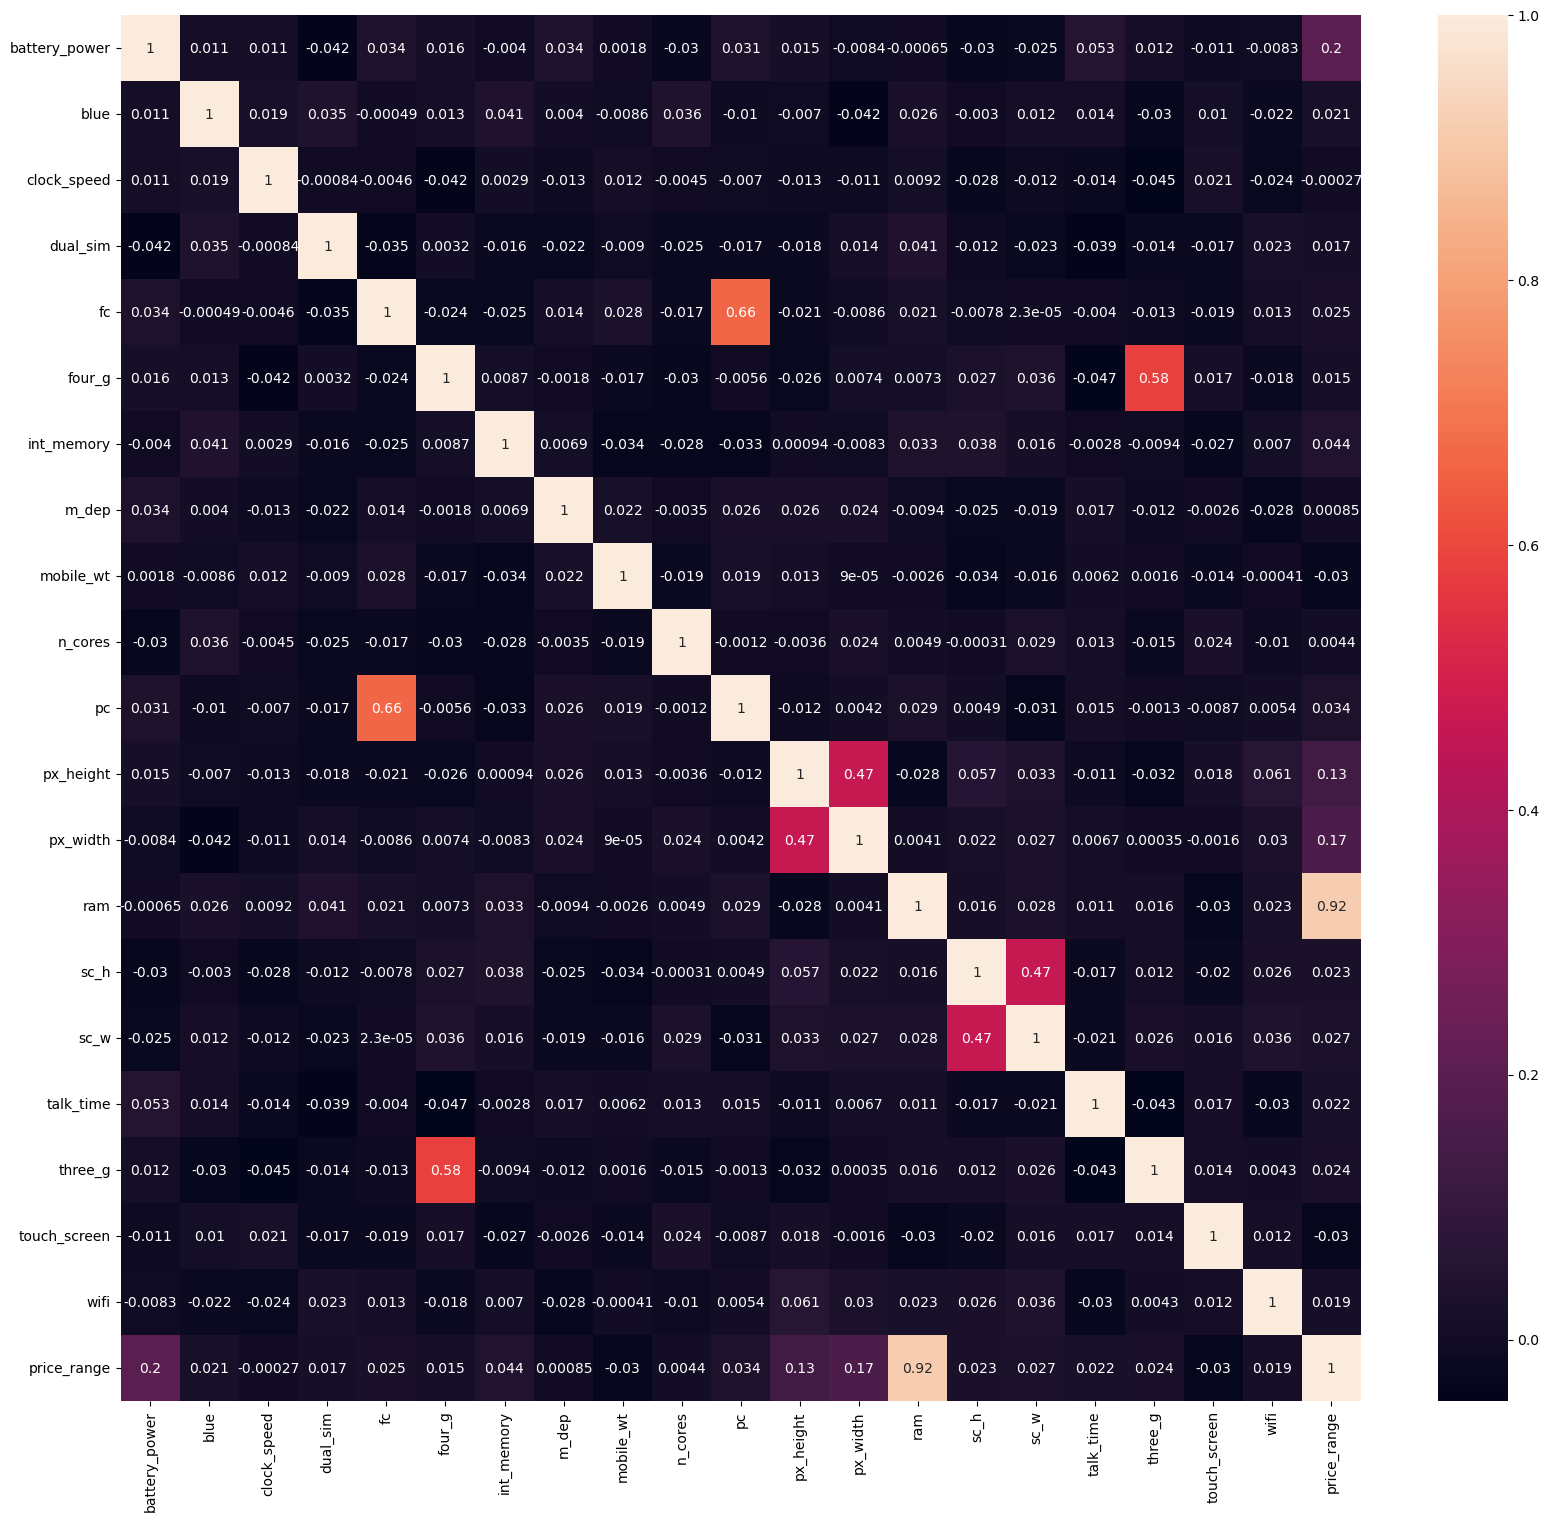

In [115]:
plt.figure(figsize=(20,18))
sns.heatmap(train_BCT.corr(), annot=True)

### Here we are done with Skewness

# Kurtosis

It is also a statistical term and an important characteristic of frequency distribution. 
It determines whether a distribution is heavy-tailed in respect of the normal distribution. 
It provides information about the shape of a frequency distribution.

kurtosis for normal distribution is equal to 3.

For a distribution having kurtosis < 3: It is called playkurtic.

For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

In [4]:
from scipy.stats import kurtosis
for col in train:
    print(col)
    print(kurtosis(train[col]))
    

battery_power
-1.224084165725428
blue
-1.9995999599959997
clock_speed
-1.3231094949498647
dual_sim
-1.9985554785277484
fc
0.27338561771466496
four_g
-1.9925902994637084
int_memory
-1.2160344731958939
m_dep
-1.2741637414186793
mobile_wt
-1.2103511507234548
n_cores
-1.2296760442374817
pc
-1.171570597995931
px_height
-0.3180748831869664
px_width
-1.1860407916882159
ram
-1.1919338732410705
sc_h
-1.190814852614817
sc_w
-0.39154816455030694
talk_time
-1.2185451180261389
three_g
-0.493930246355327
touch_screen
-1.9998559948158132
wifi
-1.9992158463058762
price_range
-1.36


A kurtosis values of these features suggests that the distribution of these variables is platykurtic. In a platykurtic distribution, the data has lighter tails compared to a normal distribution (mesokurtic). This means that the data is less peaked and has fewer extreme values (outliers) than a normal distribution.

In practical terms, a negative kurtosis value like this indicates that the data tends to have less variability in the tails and is more spread out compared to a normal distribution. It suggests that the data points are more concentrated around the mean and have fewer extreme values in both the tails of the distribution.

In [26]:
train_k1 = train
train_k1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Skewness value (Original) 0.03187454295305568
Kurtosis value (Original) -1.224084165725428
Skewness value (New) 0.43077229460716493
Kurtosis value (New) -1.0591454779193583


C:\Users\sagar\AppData\Local\Temp\ipykernel_8140\2977497568.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_k1['battery_power'])
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as

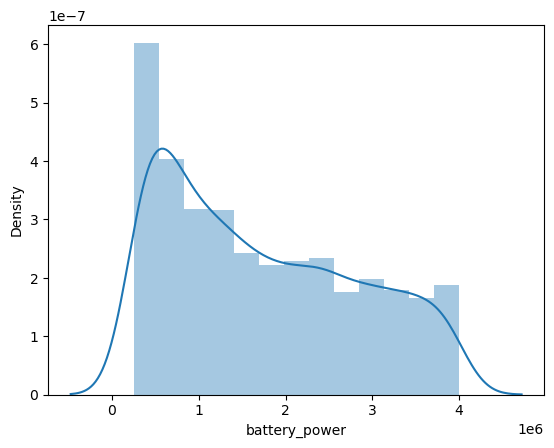

In [21]:
print("Skewness value (Original)",skew(train_k1['battery_power']))
print("Kurtosis value (Original)",kurtosis(train_k1['battery_power']))
train_k1['battery_power']=train_k1.battery_power**(2)
print("Skewness value (New)",skew(train_k1['battery_power']))
print("Kurtosis value (New)",kurtosis(train_k1['battery_power']))
plt.figure()
sns.distplot(train_k1['battery_power'])
plt.show()

Skewness value (Original) 0.03187454295305568
Kurtosis value (Original) -1.224084165725428
Skewness value (New) 0.7661817397312273
Kurtosis value (New) -0.6362435123517818


C:\Users\sagar\AppData\Local\Temp\ipykernel_8140\4089051240.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_k1['battery_power'])
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as

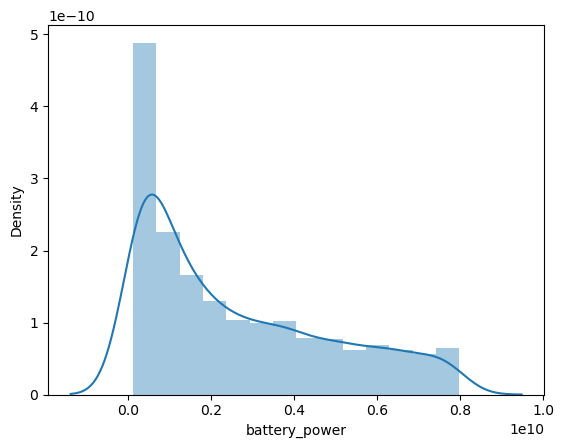

In [27]:
print("Skewness value (Original)",skew(train_k1['battery_power']))
print("Kurtosis value (Original)",kurtosis(train_k1['battery_power']))
train_k1['battery_power']=train_k1.battery_power**(3)
print("Skewness value (New)",skew(train_k1['battery_power']))
print("Kurtosis value (New)",kurtosis(train_k1['battery_power']))
plt.figure()
sns.distplot(train_k1['battery_power'])
plt.show()

Handling kurtosis is leading to skewness because a distribution having kurtosis < 3 i.e playkurtic.
Handling data with low kurtosis typically does not require specific transformations or adjustments to address kurtosis itself, 
as it is already less peaked and has lighter tails.
